## Proyecto 3

## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

Reto adicional siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes.


In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd 
from pandas import read_csv,set_option,Series, to_numeric
from pandas import DataFrame 
from os import chdir
# retroceder al directorio principal
chdir("..")

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import grid
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylabel
from matplotlib.pyplot import xlabel
from matplotlib.pyplot import show, axis , title, subplots
from matplotlib.pyplot import savefig
from matplotlib.pyplot import xticks
from seaborn import pairplot,catplot, lineplot,relplot
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score                                     
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

# decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale # Data scaling
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")

%matplotlib inline

#Configuración

import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
%matplotlib inline



### Carga de datos "costumers"

In [2]:
# Cargar el dataset "costumers"
df1 = read_csv('data/costumers.csv') 

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Integracción y limpieza</h1>
  <p></p>
</div>

### Objetivo

Integrar datos para su posterior análisis. 


#### Diccionario de datos:

| Variable                  | Tipo        | Clasificación | Descripción                                           |
|---------------------------|-------------|---------------|-------------------------------------------------------|
| Salario           | Numérico    | Continua       | Ingreso mensual del cliente en pesos mexicanos.       |
| Credito_tipo_1            | Categórico  | Binaria       | Producto financiero obtenido de la institución. 1 indica que tiene el producto, 0 que no.|
| Credito_tipo_2            | Categórico  | Binaria       | Similar a Crédito tipo 1. 1 indica que tiene el producto, 0 que no.|
| Limite_TC              | Numérico    | Continua       | Límite de crédito de la tarjeta del cliente.           |
| Tiempo_cliente       | Numérico    | Continua       | Tiempo (Años) que el cliente ha tenido una relación comercial con la institución financiera.|
| Producto_ofrecido | Categórico | Binaria | Indica si el cliente se mostró interesado en la versión previa del producto (1) o no (0).|

In [3]:
# Generamos una lista de todas las columnas del conjunto de datos
list(df1.columns)

['Salario',
 'Credito_tipo_1',
 'Credito_tipo_2',
 'Limite_TC',
 'Tiempo_cliente',
 'Producto_ofrecido']

In [4]:
# Mostrar dimenciones del df
df1.shape

(500, 6)

In [5]:
# Mostrar las 5 primeras filas
df1.head()

Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0  22572.91               1               0   30136.74             0.0   
1  10609.64               1               1   53623.94             0.0   
2  10079.48               0               1   18135.44             0.0   
3  13871.35               1               0   30831.75             0.0   
4   6541.46               0               1   20626.23             0.0   

   Producto_ofrecido  
0                  1  
1                  1  
2                  0  
3                  1  
4                  0

In [6]:
df1["Tiempo_cliente"].unique()

array([ 0. , 12.3, 14.3,  7.2, 10.9,  5.6, 11.4,  8.6, 11.5, 10.5,  7. ,
        6.1,  9.5, 11.1,  7.9,  8.1,  6.6,  5.8,  5.2,  7.5,  5.1,  8.4,
        8.7, 10.7,  9.7, 10.1, 13.1,  9.6, 11. ,  6. ,  9.3, 14.6,  6.5,
        9. ,  7.3,  6.8, 10.3,  8.8,  9.9, 12.4,  9.1,  6.4,  5.7,  5.4,
       11.7,  5.9,  5.3,  5. , 10.2, 10.4,  8.3, 15.1, 13.3,  6.9, 13.5,
       10.6, 17.8,  8.2,  9.4,  7.8,  5.5, 10.8,  7.6,  8.9, 15. , 12.9,
       11.8,  6.2, 12.7,  8.5, 12. , 12.5,  6.7,  7.1,  7.7, 17.9,  6.3,
       15.5, 16.6,  8. , 18.1,  7.4,  9.8, 12.1, 12.2, 10. , 19.3, 15.3])

In [7]:
# Imprime información de todas las columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [8]:
# Tipo de datos detectados por Pandas
df1.dtypes

Salario              float64
Credito_tipo_1         int64
Credito_tipo_2         int64
Limite_TC            float64
Tiempo_cliente       float64
Producto_ofrecido      int64
dtype: object

In [9]:
# Se verifica dato nulos o faltantes
df1.isnull().sum()

Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
dtype: int64

In [10]:
# Se determina los valores nulos como porcentaje
df1.isna().sum()/len(df1) *100

Salario              0.0
Credito_tipo_1       0.0
Credito_tipo_2       0.0
Limite_TC            0.0
Tiempo_cliente       0.0
Producto_ofrecido    0.0
dtype: float64

In [11]:
#  número de registros duplicados, no hay registros duplicado
df1.duplicated().sum()

0

In [12]:
print(f"porcentaje de completitud: {df1.count().sum() / df1.size * 100:.2f}%")

porcentaje de completitud: 100.00%


<div class="alert alert-info" role="alert">
<ul>
<li>porcentaje de valores faltantes:

- Menos de 1%: Trivial (no relevante)
- 1-5%: Manejable
- 5-15%: Manejable mediante métodos sofisticados
- Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación
         
</div>

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

### Objetivo

Comprender el contenido de los datos y responder las preguntas de negocio planteadas

### Estimación de correlación

Una buena manera de obtener una comprensión inicial de la relación entre las diferentes variables es explorar cómo se correlacionan.

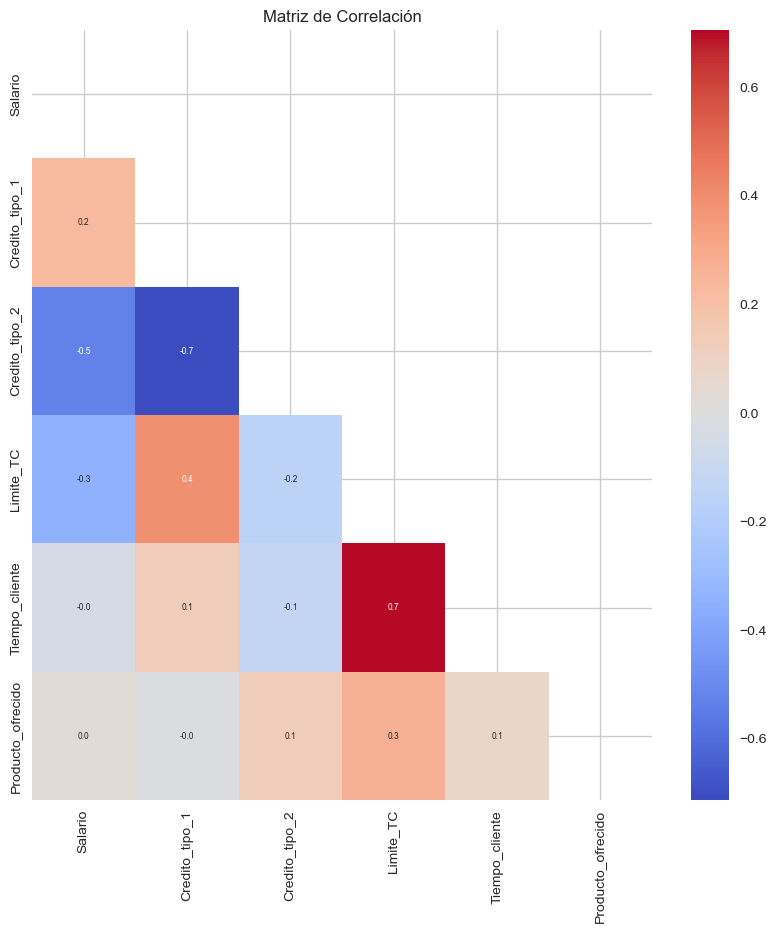

In [13]:
# Calcula la matriz de correlación
corrmat = df1.corr()
 
# Obtén la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(corrmat, dtype=bool))
 
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))
 
# Crea el mapa de calor con la mitad superior de la matriz de correlación
sns.heatmap(corrmat, mask=mask, annot=True, cmap='coolwarm', center=0, fmt=".1f", annot_kws={"size": 6})
plt.title("Matriz de Correlación") 
# Mostrar el mapa de calor
plt.show()

<div class="alert alert-info" role="alert">
Matriz de correlación:

- En las variables numéricas, se puede apreciar que no hay correlaciones muy fuertes entre las variables Producto_ofrecido, Salario, Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente
       
- La variable Limite_TC y Tiempo_cliente posee una fuerte relación 0.7
- La variable Limite_TC y Credito_tipo_1 posee una fuerte relación 0.4

## Convertir a tipo category

In [14]:
# Convertir Variables 
df1["Credito_tipo_1"]= df1["Credito_tipo_1"].astype('object')

In [15]:
# Convertir Variables 
df1["Credito_tipo_2"]= df1["Credito_tipo_2"].astype('object')

In [16]:
# Convertir Variables 
df1["Producto_ofrecido"]= df1["Producto_ofrecido"].astype('object')

In [17]:
# Tipo de datos detectados por Pandas
df1.dtypes

Salario              float64
Credito_tipo_1        object
Credito_tipo_2        object
Limite_TC            float64
Tiempo_cliente       float64
Producto_ofrecido     object
dtype: object

In [18]:
# Estadisticas variables numericas 
df1.describe().T

count         mean           std       min        25%  \
Salario         500.0  12089.09738   5123.700116  -2911.65   8534.350   
Limite_TC       500.0  44784.55496  22150.923996 -22207.95  30096.285   
Tiempo_cliente  500.0      4.32700      4.784776      0.00      0.000   

                      50%         75%        max  
Salario         11438.600  15171.4675   30041.40  
Limite_TC       47991.515  59108.1750  118636.82  
Tiempo_cliente      0.000      8.4000      19.30

<div class="alert alert-info" role="alert">
Resumen de la distribución y la variabilidad de las variables en el conjunto de datos:
 
   - No hay valores faltantes para las variables numéricas.
   - También podemos observar que el promedio es años 4.32700 que el cliente ha tenido relación con el banco.
   - Las variables salario y Limite_TC tienen datos anómalos con signo negativo que se graficaran más adelante.  

<function matplotlib.pyplot.show(close=None, block=None)>

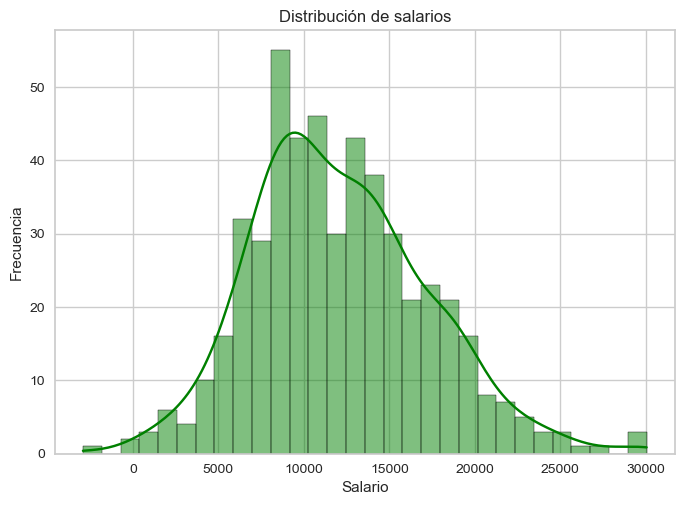

In [19]:
# Distribución de la variable Salario 
sns.histplot(data=df1, x='Salario', bins=30, kde=True, color='green')

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable objetivo Salario:
 
   - Se observa que hay valores extremos en lado derecho e izquierdo de la cola, se utilizo el bins 30 para representar claramente la distribución.
  

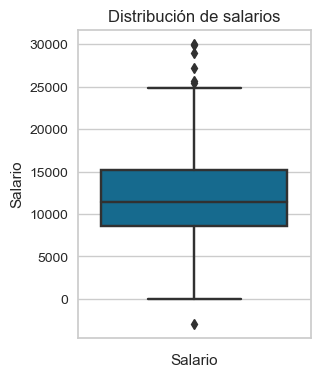

In [20]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df1["Salario"])

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Salario')
plt.show()

<div class="alert alert-info" role="alert">
Box Plots para comprender las distribuciones del Salario:
 
   - Este gráfico indica la presencia de valores extremos más claramente que el histograma. Esto se puede atribuir a la disparidad de salarios de los clientes. Otra información que se puede observar es la presencia de salarios de los clientes con signo negativo. 

<function matplotlib.pyplot.show(close=None, block=None)>

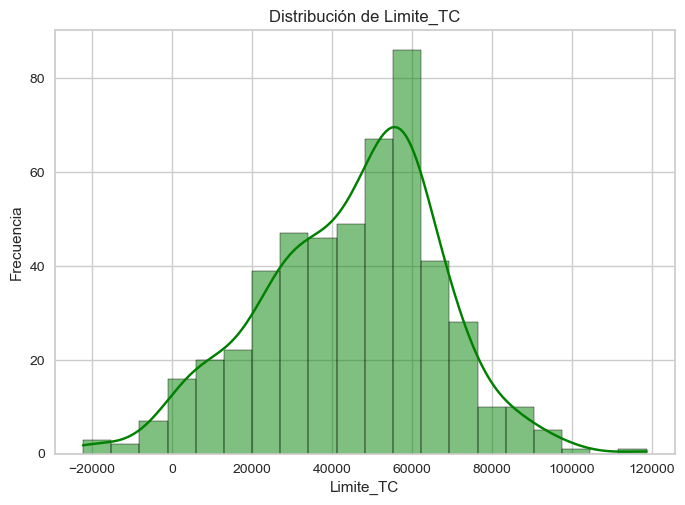

In [21]:
# Distribución de la variable limite de la tarjeta de crédito
sns.histplot(data=df1, x='Limite_TC', bins=20, kde=True, color='green')

plt.title('Distribución de Limite_TC')
plt.xlabel('Limite_TC')
plt.ylabel('Frecuencia')
plt.show

<div class="alert alert-info" role="alert">
Distribución de Limite_TC:
 
   - Se observa que hay valores extremos en lada derecho de la cola, se utilizo el bins 20 para representar claramente la distribución.
   - Se aprecia que la frecuencia de más de 65 clientes tienen un límite de la tarjeta de crédito entre 50000 y 60000. 
   - También nos encontramos con valores negativos.

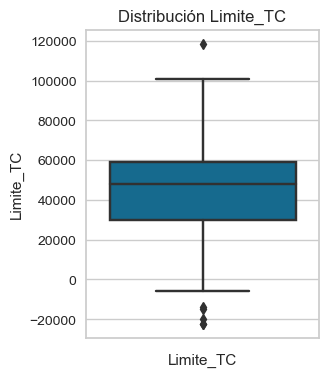

In [22]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df1["Limite_TC"])

plt.title('Distribución Limite_TC')
plt.xlabel('Limite_TC')
plt.ylabel('Limite_TC')
plt.show()

<div class="alert alert-info" role="alert">
Box Plots para comprender la Distribución Limite_TC:
 
   - En este gráfico visualizamos valores extremos más claramente que el histograma, se puede verificar la presencia de valores negativos.

<function matplotlib.pyplot.show(close=None, block=None)>

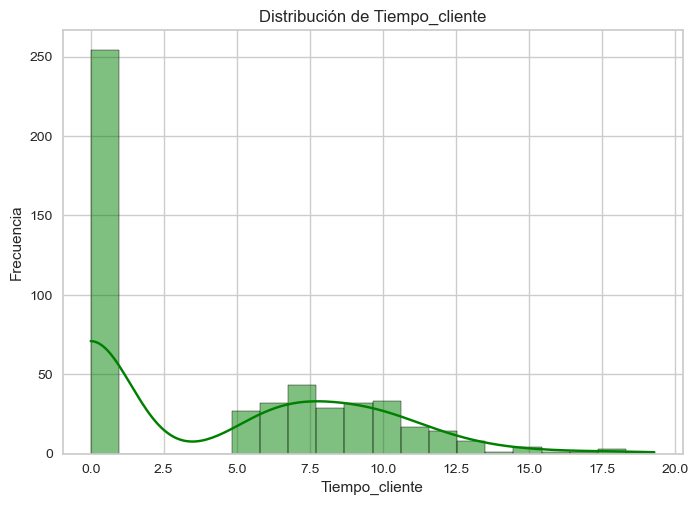

In [23]:
# Distribución de la varible Tiempo cliente
sns.histplot(data=df1, x='Tiempo_cliente', bins=20, kde=True, color='green')

plt.title('Distribución de Tiempo_cliente')
plt.xlabel('Tiempo_cliente')
plt.ylabel('Frecuencia')
plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable Tiempo_cliente:
 
   - Se observa que la frecuencia de mas de 250 clientes tuvo una relación comercial de cero años, en cambio la frecuencia de clientes de mas 20 se encuentra en un rango de 5 y 12.5.
   - La desviación estándar de la variable Tiempo_cliente es de alrededor de 4.7 años, lo que indica que la mayoría de los clientes están dentro de un rango de +/- 4.7 años de la media.

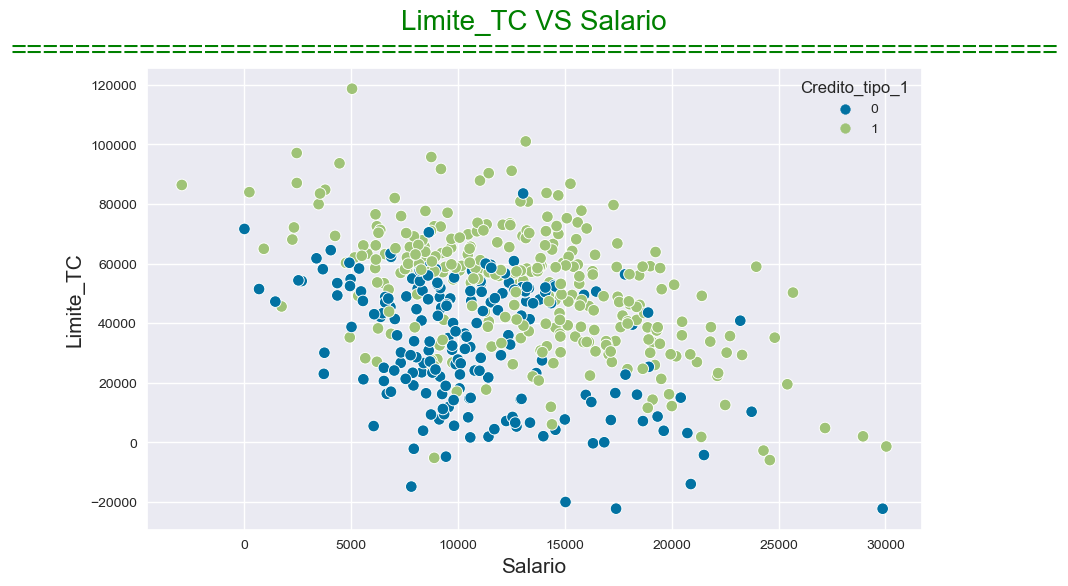

In [24]:
# Gráfica de dispersión, relación Limite_TC VS Salario

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df1, x="Salario", y= "Limite_TC", hue="Credito_tipo_1", s=70)
plt.title("Limite_TC VS Salario\n=================================================================", fontsize=20, color="green")
plt.xlabel("Salario", fontsize=15)
plt.ylabel("Limite_TC", fontsize=15)
plt.show()

<div class="alert alert-info" role="alert">
Gráfica de dispersión, Limite_TC VS Salario:
 
   - Existe una correlación nula entre Limite_TC VS Salario. 


In [25]:
df1.columns

Index(['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC',
       'Tiempo_cliente', 'Producto_ofrecido'],
      dtype='object')

                     Salario
Tiempo_cliente              
0.0             12460.763150
5.0             15758.110000
5.1             13071.950000
5.2              7435.036000
5.3              9291.506667
...                      ...
16.6            13053.740000
17.8             5052.040000
17.9            14149.020000
18.1            11444.330000
19.3            13175.690000

[88 rows x 1 columns]


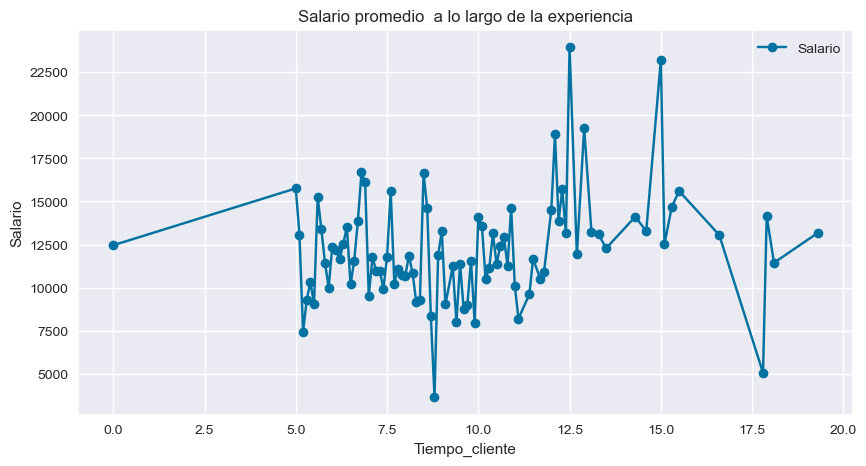

In [26]:
# Salario promedio  a lo largo de la experiencia
promedios_por_ano = df1.groupby("Tiempo_cliente")[["Salario"]].mean()
plt.figure(figsize=(10,5))
print(promedios_por_ano)
plt.plot(promedios_por_ano.index, promedios_por_ano["Salario"], marker='o', label="Salario") 
plt.title('Salario promedio  a lo largo de la experiencia')
plt.xlabel('Tiempo_cliente')
plt.ylabel('Salario')
plt.legend()
plt.show()

<div class="alert alert-info" role="alert">
Gráfica de línea de la variable Salario por la evolución del tiempo del cliente:
    
- Este grafico de línea muestra la evolución promedio del "Salario" a lo largo del tiempo.

### Distribución de variables categóricas 

In [27]:
# Variables categóricas del tipo object("O")
df1.describe(include="O").T

count  unique  top  freq
Credito_tipo_1       500       2    1   305
Credito_tipo_2       500       2    0   271
Producto_ofrecido    500       2    1   301

<div class="alert alert-info" role="alert">
Resumen de variables categóricas:
    
- En esta tabla se muestra un resumen de conteo, valores únicos y frecuencia de las variables categóricas.   
- En la tabla indica que no hay valores faltantes para las variables categóricas.
- La variable Credito_tipo_1 indica que existen 2 valores únicos, el que más se repite  es el analista 305.   

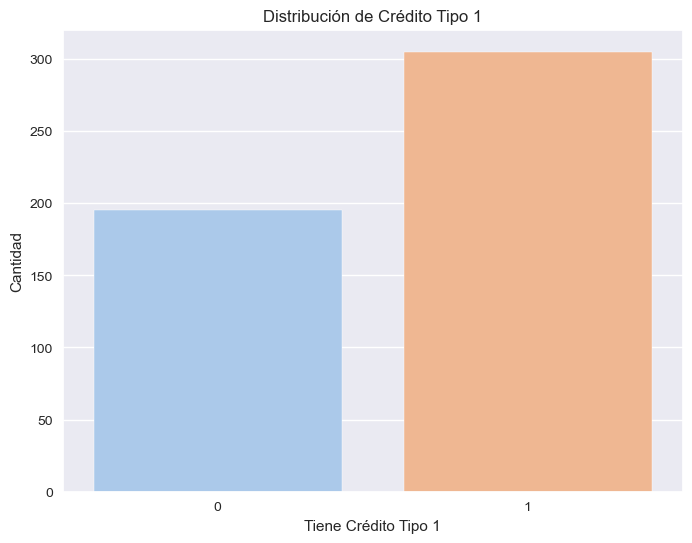

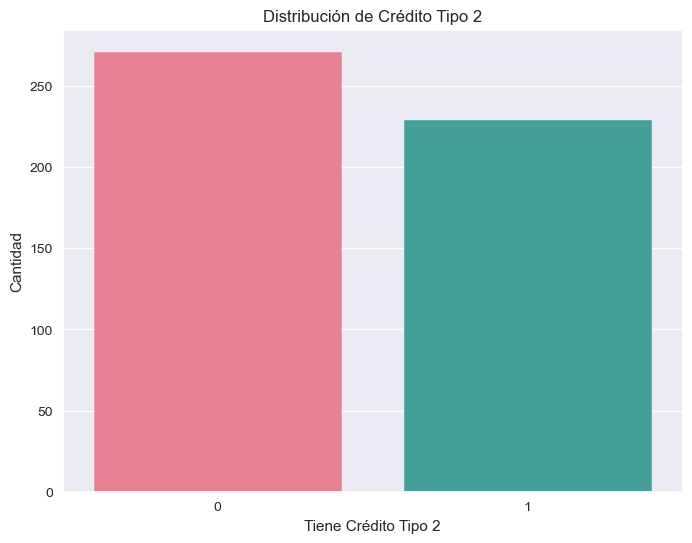

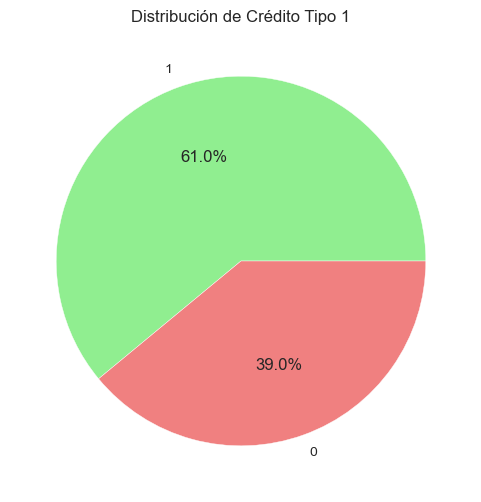

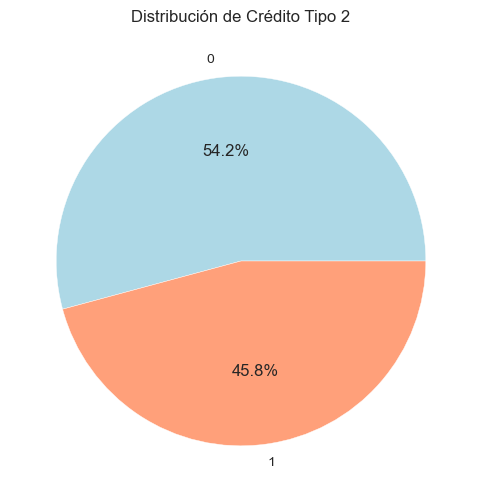

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#  'Credito_tipo_1' y 'Credito_tipo_2' son tus variables categóricas

# Gráfico de barras para 'Credito_tipo_1'
plt.figure(figsize=(8, 6))
sns.countplot(x='Credito_tipo_1', data=df1, palette='pastel')
plt.title('Distribución de Crédito Tipo 1')
plt.xlabel('Tiene Crédito Tipo 1')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para 'Credito_tipo_2'
plt.figure(figsize=(8, 6))
sns.countplot(x='Credito_tipo_2', data=df1, palette='husl')
plt.title('Distribución de Crédito Tipo 2')
plt.xlabel('Tiene Crédito Tipo 2')
plt.ylabel('Cantidad')
plt.show()

# Gráfico circular para 'Credito_tipo_1'
plt.figure(figsize=(6, 6))
df1['Credito_tipo_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribución de Crédito Tipo 1')
plt.ylabel('')
plt.show()

# Gráfico circular para 'Credito_tipo_2'
plt.figure(figsize=(6, 6))
df1['Credito_tipo_2'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightsalmon'])
plt.title('Distribución de Crédito Tipo 2')
plt.ylabel('')
plt.show()


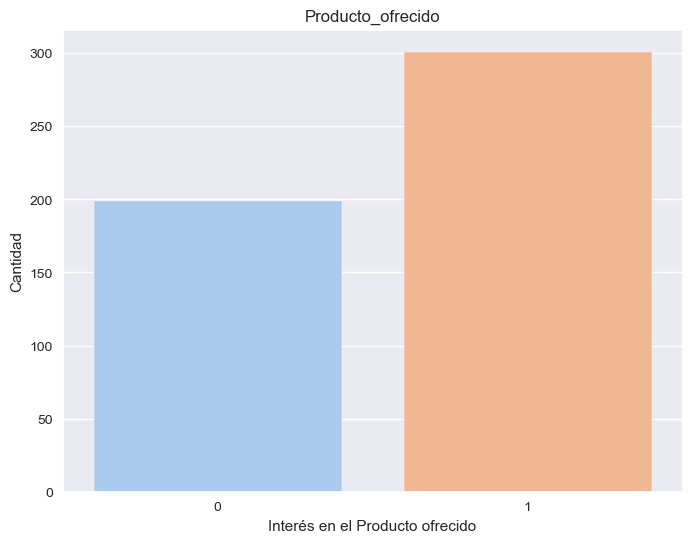

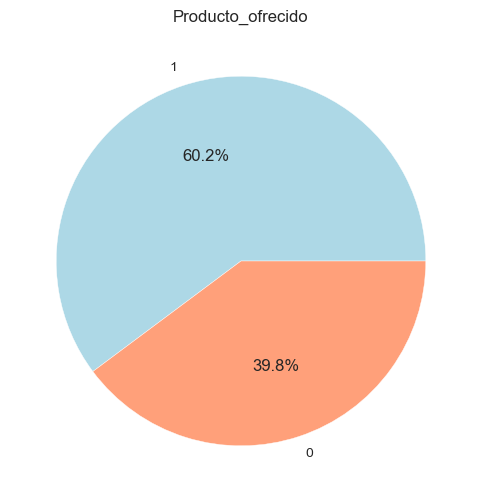

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



# Gráfico de barras para 'Previamente_se_ofrecio'
plt.figure(figsize=(8, 6))
sns.countplot(x='Producto_ofrecido', data=df1, palette='pastel')
plt.title('Producto_ofrecido')
plt.xlabel('Interés en el Producto ofrecido')
plt.ylabel('Cantidad')
plt.show()

# Gráfico circular para 'Previamente_se_ofrecio'
plt.figure(figsize=(6, 6))
df1['Producto_ofrecido'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightsalmon'])
plt.title('Producto_ofrecido')
plt.ylabel('')
plt.show()


<div class="alert alert-info" role="alert">
Distribución de variables categóricas con otras de interés del conjunto de datos:
 
   - La mayoría de los clientes del crédito tipo 1 tiene el 61 % del producto y el 39% no cuenta con el producto.
   - La mayoría de los clientes del crédito tipo 2 tiene el 45.8 % del producto y el 54.2% no cuenta con el producto.
   - La mayoría de los clientes del producto ofrecido tiene el 60.2 % del producto ofrecido y el 39.8% no cuenta con el producto ofrecido.

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Ingeniería de características</h1>
  <p></p>
</div>

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    object 
 2   Credito_tipo_2     500 non-null    object 
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    object 
dtypes: float64(3), object(3)
memory usage: 23.6+ KB


### Revisión y eliminación de outliers

In [31]:
# Revisión y eliminación de outliers

k = 3
neighbors_model= NearestNeighbors(n_neighbors=k)
neighbors_model.fit(df1)

distances, indices = neighbors_model.kneighbors(df1)

max_distances = distances[:, -1] # Distancia maximapor punto

threshold = max_distances.mean() + 2 * max_distances.std() # Umbral 

outliers_indices = df1.index[max_distances > threshold] # Identificar los outliers

df1.drop(outliers_indices, inplace=True) # eliminar los outliers del DataFrame original

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            486 non-null    float64
 1   Credito_tipo_1     486 non-null    object 
 2   Credito_tipo_2     486 non-null    object 
 3   Limite_TC          486 non-null    float64
 4   Tiempo_cliente     486 non-null    float64
 5   Producto_ofrecido  486 non-null    object 
dtypes: float64(3), object(3)
memory usage: 26.6+ KB


### Grafica después de eliminar datos atípicos 

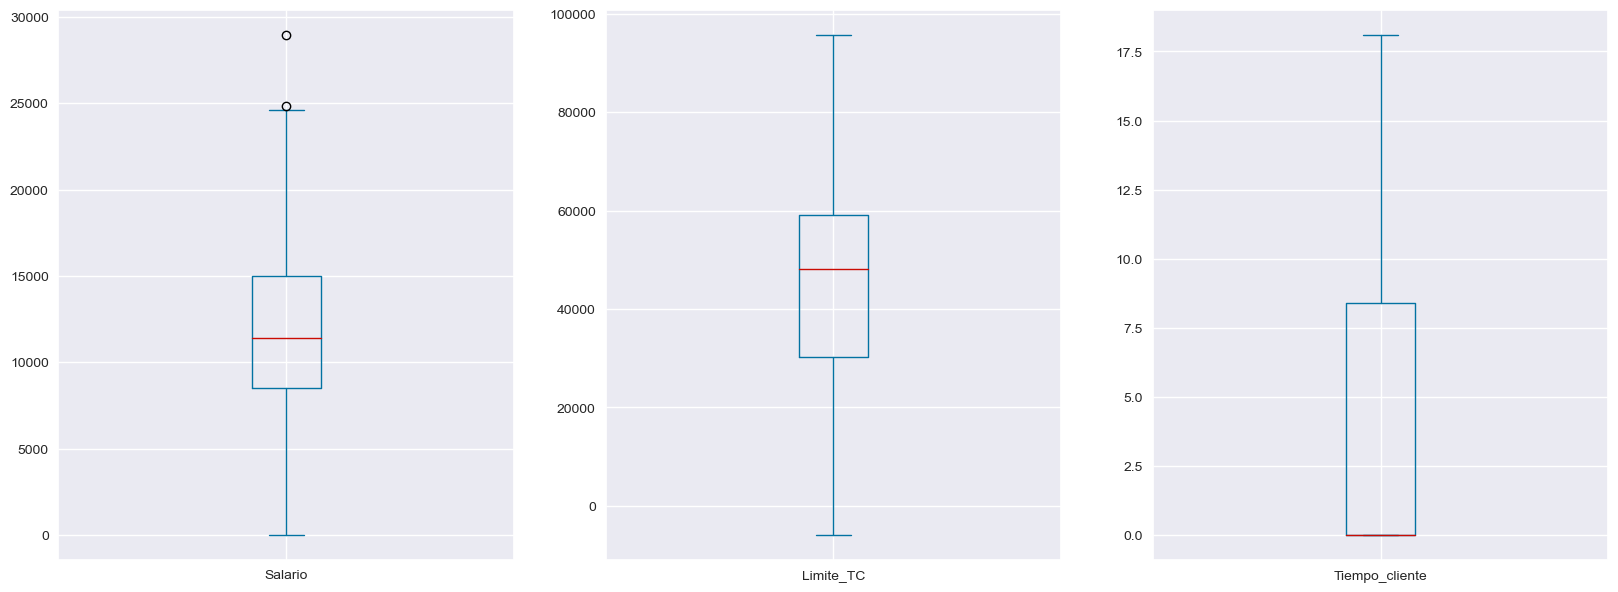

In [33]:
df1.plot(kind="box",subplots=True,layout=(6,3), figsize=(20,50),sharex=False)
grid(True)
plt.xticks(rotation=90)
plt.show()

In [34]:
df1.describe().T

count          mean           std      min        25%  \
Salario         486.0  11941.326852   4809.644162    18.11   8542.455   
Limite_TC       486.0  45164.671893  20656.589271 -5897.92  30343.195   
Tiempo_cliente  486.0      4.312551      4.705525     0.00      0.000   

                     50%         75%       max  
Salario         11385.20  14984.0550  28951.02  
Limite_TC       48154.25  59079.2125  95741.16  
Tiempo_cliente      0.00      8.4000     18.10

In [35]:
# Variables categóricas del tipo object("O")
df1.describe(include="O").T

count  unique  top  freq
Credito_tipo_1       486       2    1   296
Credito_tipo_2       486       2    0   263
Producto_ofrecido    486       2    1   293

<div class="alert alert-info" role="alert">
Con la eliminación de datos atípicos se quedan con 486 registros de 500.

### Transformaciones  

In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
# Creando una copia de datos
ds = df1.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("Todas las caracteristicas ahora están escaladas.")

Todas las caracteristicas ahora están escaladas.


In [38]:
# Datos escalados que se utilizarán para reducir la dimensionalidad.
print("Dataframe que se utilizará para el modelado posterior:")
scaled_ds.head()

Dataframe que se utilizará para el modelado posterior:


Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0  2.212750        0.801182       -0.920820  -0.728262       -0.917431   
1 -0.277164        0.801182        1.085989   0.409941       -0.917431   
2 -0.387506       -1.248157        1.085989  -1.309852       -0.917431   
3  0.401695        0.801182       -0.920820  -0.694582       -0.917431   
4 -1.123873       -1.248157        1.085989  -1.189147       -0.917431   

   Producto_ofrecido  
0           0.811605  
1           0.811605  
2          -1.232126  
3           0.811605  
4          -1.232126

In [39]:
scaled_ds.describe().T

count          mean      std       min       25%       50%  \
Salario            486.0  2.448887e-16  1.00103 -2.481577 -0.707407 -0.115747   
Credito_tipo_1     486.0  1.096517e-17  1.00103 -1.248157 -1.248157  0.801182   
Credito_tipo_2     486.0 -4.203314e-17  1.00103 -0.920820 -0.920820 -0.920820   
Limite_TC          486.0 -8.223874e-17  1.00103 -2.474523 -0.718257  0.144877   
Tiempo_cliente     486.0  1.078241e-16  1.00103 -0.917431 -0.917431 -0.917431   
Producto_ofrecido  486.0  5.482583e-17  1.00103 -1.232126 -1.232126  0.811605   

                        75%       max  
Salario            0.633282  3.540224  
Credito_tipo_1     0.801182  0.801182  
Credito_tipo_2     1.085989  1.085989  
Limite_TC          0.674307  2.450966  
Tiempo_cliente     0.869544  2.933074  
Producto_ofrecido  0.811605  0.811605

### Construcción del modelo 

In [40]:
# K-medias con K arbitrario

seg_kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=50,n_init = 25, random_state = 123)
seg_kmeans.fit(scaled_ds)

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, n_init=25, random_state=123)

In [41]:
seg_kmeans.labels_

array([1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2,
       2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0,

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

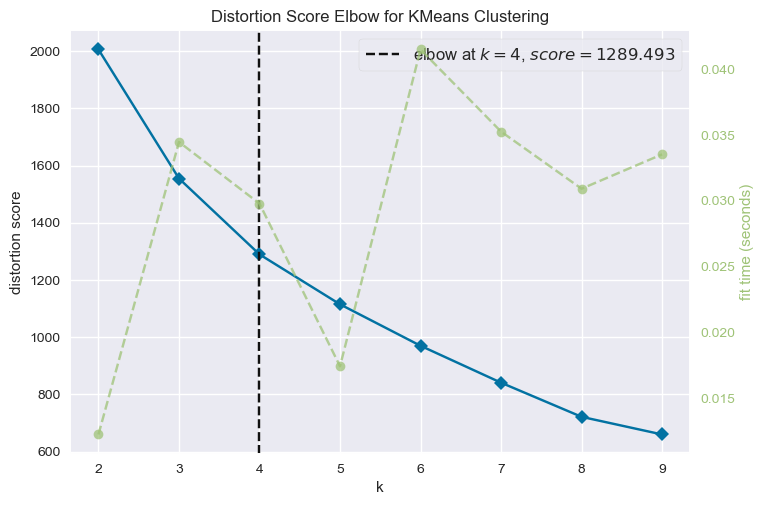

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Método del codo (Elbow method) para identificar el número óptimo de clusters
seg_kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(seg_kmeans, k=(2, 10), metric='distortion')
visualizer.fit(scaled_ds)
visualizer.show()

In [43]:
# En la grafica anterior se determino el numero óptimo de clusters K=4
seg_kmeans = KMeans(n_clusters=4,init="k-means++", max_iter=50,n_init = 25, random_state = 123)
seg_kmeans.fit(scaled_ds)

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4, n_init=25, random_state=123)

In [44]:
df1["cluster"] = seg_kmeans.labels_

In [45]:
df1.head()

Salario Credito_tipo_1 Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0  22572.91              1              0   30136.74             0.0   
1  10609.64              1              1   53623.94             0.0   
2  10079.48              0              1   18135.44             0.0   
3  13871.35              1              0   30831.75             0.0   
4   6541.46              0              1   20626.23             0.0   

  Producto_ofrecido  cluster  
0                 1        3  
1                 1        1  
2                 0        0  
3                 1        3  
4                 0        0

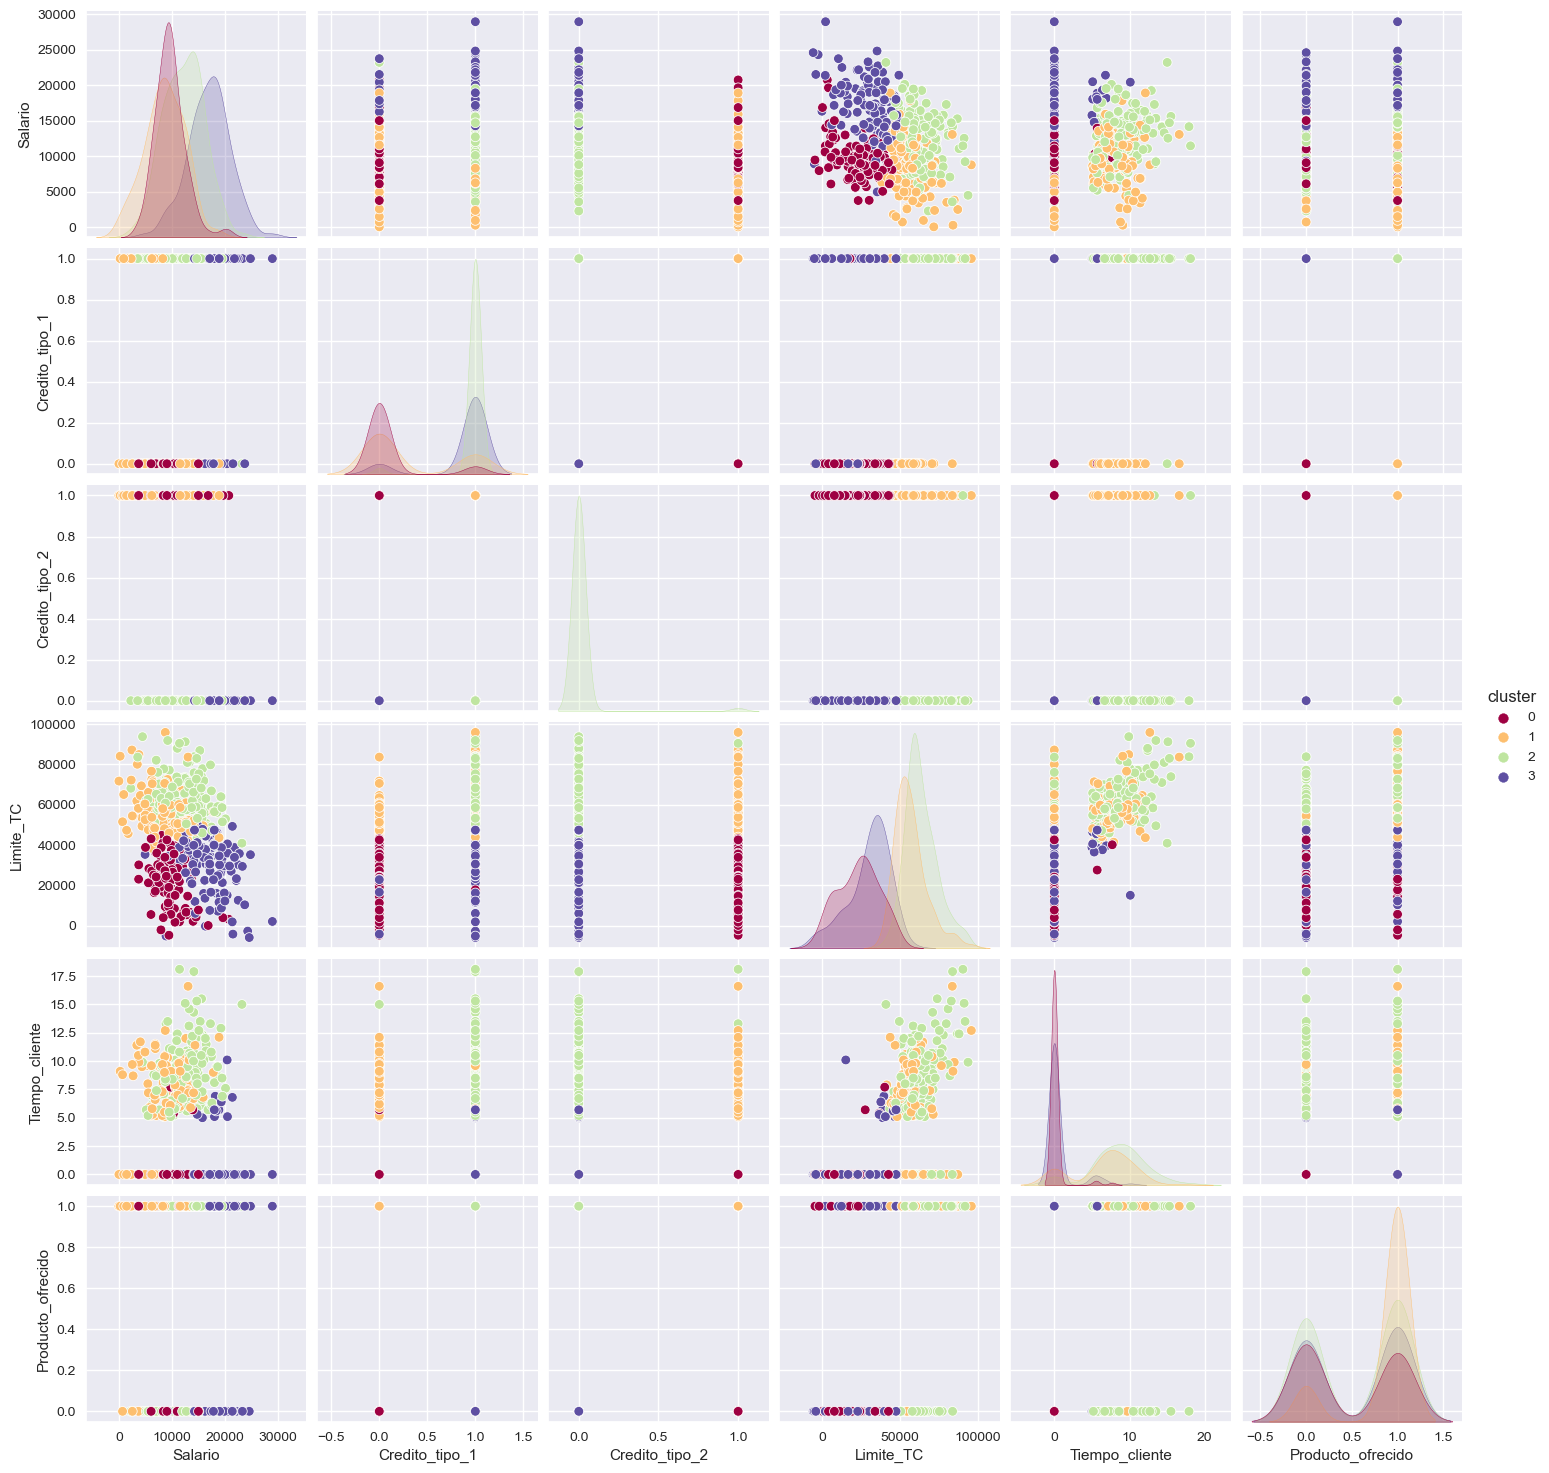

In [46]:
#Analiza multiples relaciones entre variables numericas
pairplot(df1, hue='cluster', palette='Spectral', diag_kind='kde')

<div class="alert alert-info" role="alert">
    
Matriz de gráficos de dispersión mostrando histogramas y correlaciones entre variables.

Se observa lo siguiente:
    
- Los histogramas mostrados en la diagonal muestran la distribución de cada variable, ninguna de las variables de la diagonal tiene un comportamiento de distribución normal.
- Existe una buena relación lineal entre el tiempo_cliente y el limite_TC.

### Análisis de componentes principales (PCA)

In [47]:
# decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale # Data scaling
from sklearn.impute import SimpleImputer

In [48]:
# Iniciando PCA para reducir las dimensiones, también conocidas como características.
pca = PCA()

# Adaptar PCA a nuestros datos estandarizados.
#Tenemos que tomar el scaled_ds del escalador nuevamente
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(ds.columns))
pca_ds

Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0    0.957732        2.203699        1.565740   0.103348        0.333900   
1   -0.357320       -0.388256        0.731174  -1.294943        0.979701   
2   -2.321261        0.724230       -0.972793   0.291625        0.103490   
3    0.487453        1.267041        0.896351  -0.882984       -0.265099   
4   -2.468208        0.283128       -1.248314  -0.121532       -0.142860   
..        ...             ...             ...        ...             ...   
481 -2.700389        0.931267       -1.082284   0.176850        0.004231   
482 -1.889680       -0.047103       -1.087631   0.043494        0.002901   
483 -2.255856        1.527703       -0.578722   0.904857        0.455226   
484  0.663517        1.621306        1.148567  -0.511175       -0.039410   
485  2.730013       -1.617378        0.531222   0.954762       -0.015607   

     Producto_ofrecido  
0            -0.263741  
1            -0.341747  
2            -0.090053  
3             0.370946  
4             0.092548  
..                 ...  
481           0.523507  
482          -0.845225  
483          -0.107031  
484           0.133711  
485           0.125913  

[486 rows x 6 columns]

In [49]:
pca_ds.describe().T

count          mean       std       min       25%  \
Salario            486.0  3.655055e-17  1.476634 -2.797845 -1.127928   
Credito_tipo_1     486.0  0.000000e+00  1.332743 -3.231368 -0.992268   
Credito_tipo_2     486.0  4.020561e-17  1.009702 -1.944660 -1.056253   
Limite_TC          486.0  1.462022e-17  0.855912 -2.450662 -0.537669   
Tiempo_cliente     486.0 -3.746432e-17  0.439029 -1.053010 -0.256536   
Producto_ofrecido  486.0  4.203314e-17  0.333003 -0.867101 -0.222294   

                        50%       75%       max  
Salario            0.361646  1.276202  2.846595  
Credito_tipo_1    -0.137822  0.990055  3.899140  
Credito_tipo_2     0.435399  0.821337  2.098201  
Limite_TC          0.006325  0.621144  3.160157  
Tiempo_cliente    -0.054887  0.174667  1.320594  
Producto_ofrecido  0.003495  0.214093  1.549881

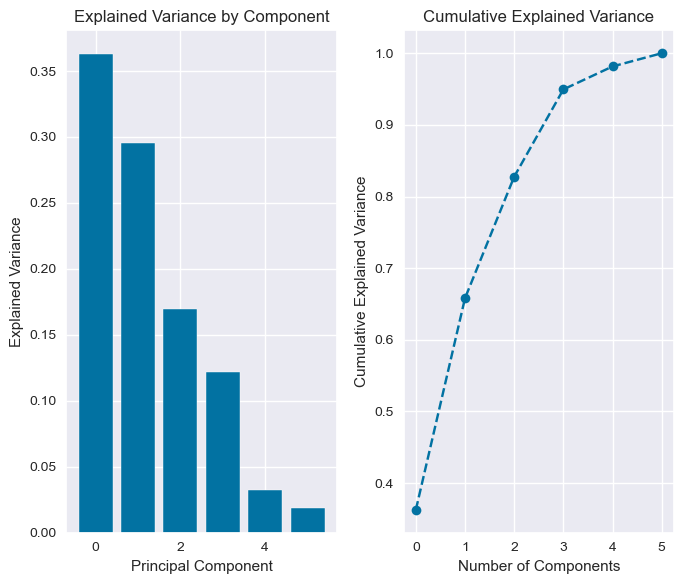

In [50]:
# Calcular la varianza explicada por componente y la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
 
# Graficar la varianza explicada y la varianza acumulada
plt.figure(figsize=(7, 6))
 
# Subplot para la varianza explicada
plt.subplot(1, 2, 1)
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Component')
 
# Subplot para la varianza explicada acumulada
plt.subplot(1, 2, 2)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
 
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    
Con el grafico anterior mas del 90 % de la varianza de los datos se explica por los primeros 4 componentes.

### Evaluación de las contribuciones de características

In [51]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

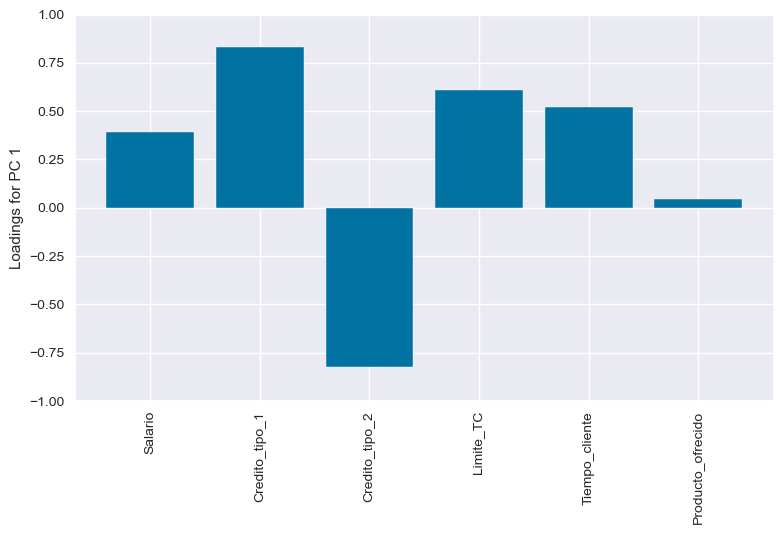

In [52]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(6), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(6))
ax.set_xticklabels(pca_ds.columns[:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

In [53]:
# Para en este caso se Elegio 2 componentes para poder mejor representarlas en un plano 2d.
pca2 = PCA(n_components=2)

In [54]:
pca2.fit(scaled_ds) # Entrenamos PCA

PCA(n_components=2)

In [55]:
pca_ds2=pca2.transform(scaled_ds)# Aplicamos la trrasformacion

In [56]:
pca_ds2=pd.DataFrame(pca_ds2,columns=["Componente1","Componente2"])

In [57]:
pca_ds2

Componente1  Componente2
0       0.957732     2.203699
1      -0.357320    -0.388256
2      -2.321261     0.724230
3       0.487453     1.267041
4      -2.468208     0.283128
..           ...          ...
481    -2.700389     0.931267
482    -1.889680    -0.047103
483    -2.255856     1.527703
484     0.663517     1.621306
485     2.730013    -1.617378

[486 rows x 2 columns]

In [58]:
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)
df_loadings = pd.DataFrame(loadings, columns=['Componente1', 'Componente2'],index=ds.columns)
df_loadings

Componente1  Componente2
Salario               0.394800     0.675323
Credito_tipo_1        0.834261     0.194527
Credito_tipo_2       -0.824240    -0.457780
Limite_TC             0.610839    -0.750513
Tiempo_cliente        0.523331    -0.635265
Producto_ofrecido     0.047100    -0.325434

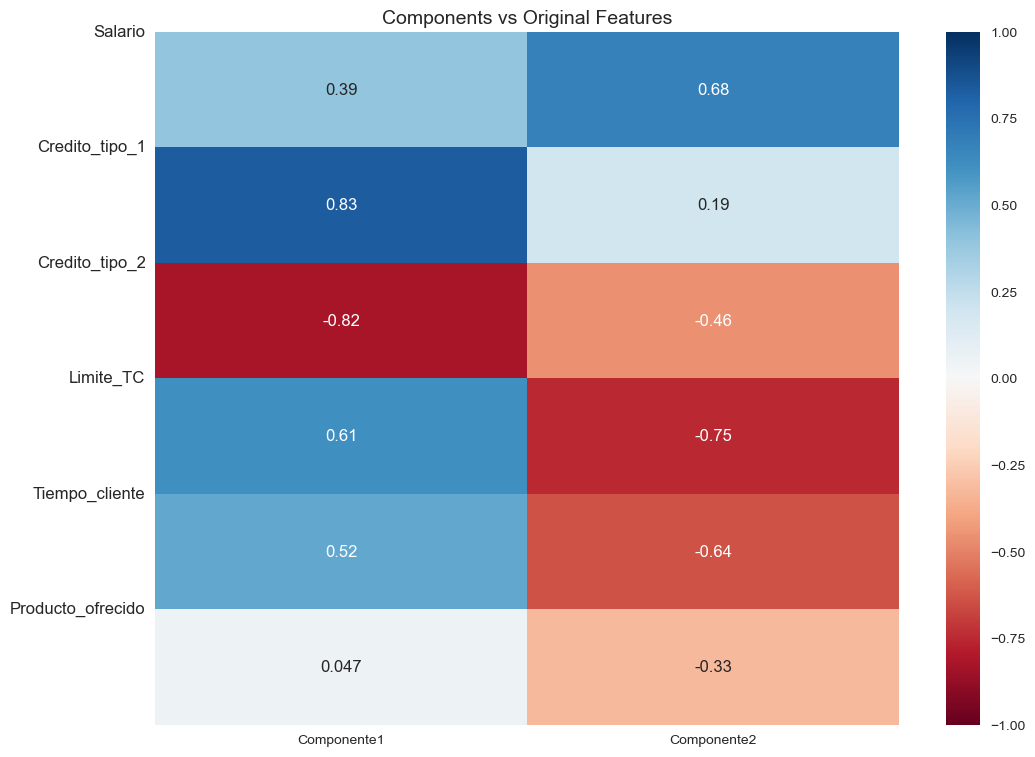

In [59]:
# Mapa de calor para componentes principales frente a características originales.
plt.figure(figsize=(12,9))
sns.heatmap(df_loadings,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4, 5], 
            ['Salario', 'Credito_tipo_1', 
            'Credito_tipo_2','Limite_TC',
            'Tiempo_cliente', 'Producto_ofrecido'],
           rotation = 0,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [60]:
pca2

PCA(n_components=2)

C:\Users\marce\AppData\Local\Temp\ipykernel_22772\1173816905.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_ds2_Componente1,pca_ds2_Componente2,cmap=plt.cm.Set1, edgecolor='k')


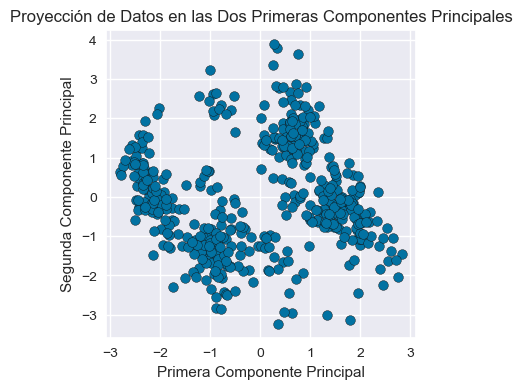

In [61]:
pca_ds2_Componente1 = pca_ds2.Componente1
pca_ds2_Componente2 = pca_ds2.Componente2
# Graficamos las proyecciones en las dos primeras componentes principales
plt.figure(figsize=(4, 4))
plt.scatter(pca_ds2_Componente1,pca_ds2_Componente2,cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Proyección de Datos en las Dos Primeras Componentes Principales')
plt.show()

### K-Means Clustering con PCA

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

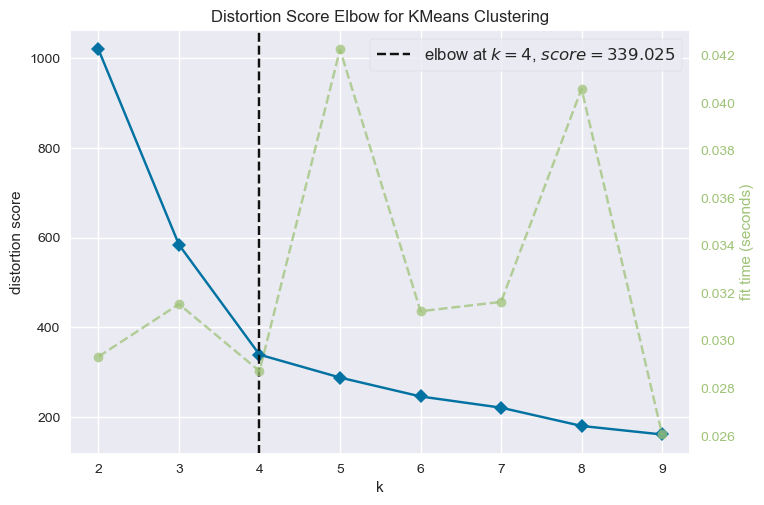

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Método del codo (Elbow method) para identificar el número óptimo de clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(pca_ds2)
visualizer.show()

<div class="alert alert-info" role="alert">
    
Como se aprecia en el grafico el número de cluster óptimo es de 4 cluster y un score de 339.025.

### Entrenamiento del modelo

In [64]:
# Hemos elegido 4 grupos, por lo que ejecutamos K-means con un número de grupos igual a 4.
# Mismo inicializador y estado aleatorio que antes
modelo_kmeans = KMeans(n_clusters=4,init="k-means++",max_iter=50, n_init=25, random_state=123)

# Ajustamos nuestros datos con el modelo PCA K-medias
modelo_kmeans.fit(pca_ds2)

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4, n_init=25, random_state=123)

In [65]:
modelo_kmeans.labels_

array([3, 0, 2, 3, 2, 1, 1, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2,
       1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 2, 3, 1, 0, 3, 0, 3, 1, 2, 1, 3,
       3, 3, 3, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 3, 0, 1, 3, 1, 0, 2,
       2, 3, 1, 2, 1, 0, 1, 0, 1, 3, 3, 3, 3, 2, 1, 1, 0, 2, 1, 3, 3, 1,
       2, 1, 0, 1, 1, 3, 3, 2, 3, 1, 3, 1, 0, 0, 3, 2, 0, 1, 2, 0, 3, 1,
       2, 1, 1, 3, 1, 3, 0, 1, 2, 2, 2, 0, 3, 2, 0, 2, 1, 0, 3, 0, 2, 0,
       2, 3, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 3, 0, 1, 1, 3, 1, 0, 3, 2, 1,
       0, 0, 1, 3, 1, 3, 1, 2, 0, 0, 3, 2, 0, 1, 0, 3, 3, 2, 2, 3, 3, 0,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 3, 3, 0, 3, 2,
       3, 1, 0, 0, 3, 0, 1, 3, 3, 3, 0, 2, 0, 1, 3, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 3, 2, 2, 3, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 3, 0, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 0, 3, 2, 0, 0, 3, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 2, 1, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 0, 2, 3, 1, 1,
       1, 3, 1, 0, 0, 2, 1, 3, 1, 3, 3, 0, 1, 2, 2,

In [66]:
# Obtención de etiquetas de los clusters para cada muestra
labels= modelo_kmeans.labels_

In [67]:
etiquetas=labels= modelo_kmeans.labels_

In [68]:
pca_ds2["cluster"] = etiquetas

In [69]:
pca_ds2.head(10)

Componente1  Componente2  cluster
0     0.957732     2.203699        3
1    -0.357320    -0.388256        0
2    -2.321261     0.724230        2
3     0.487453     1.267041        3
4    -2.468208     0.283128        2
5     2.090112    -0.584351        1
6     2.382242    -1.249783        1
7    -1.151165    -1.437328        0
8     1.727192    -0.186719        1
9     1.301467    -0.018878        1

In [70]:
# Obtención de los centroides de cada clusters.
centers = modelo_kmeans.cluster_centers_
center_coord = pd.DataFrame(centers)
center_coord

0         1
0 -0.689193 -1.450300
1  1.616966 -0.416494
2 -2.118534  0.326258
3  0.488138  1.775447

### Uso del PCA en el clustering

C:\Users\marce\AppData\Local\Temp\ipykernel_22772\4209730481.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=pca_ds2, x="Componente1", y="Componente2", hue="cluster", s=60, palette=['green','orange','brown','blue','red'])


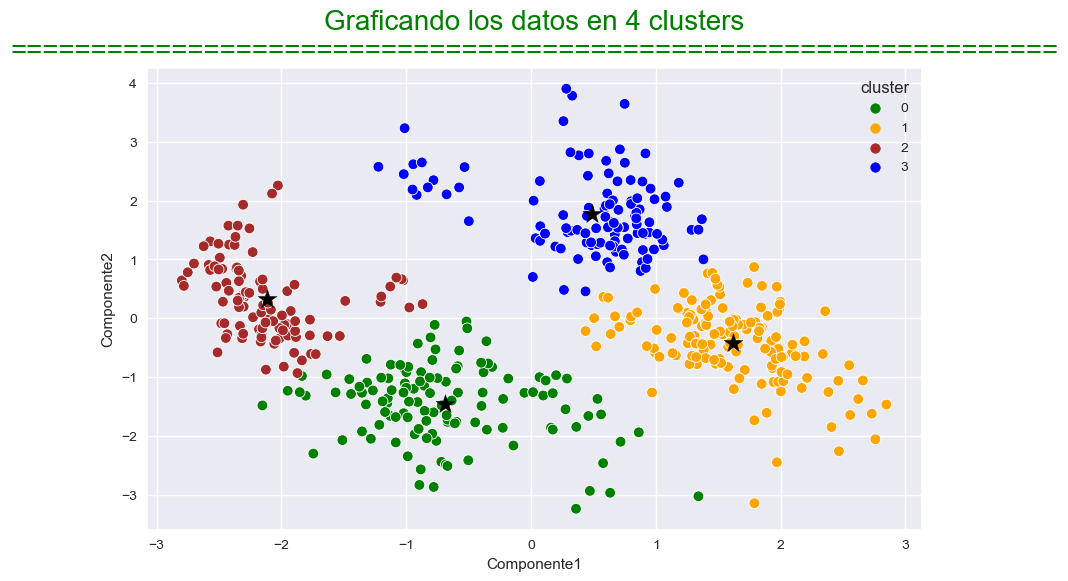

In [71]:
# Hemos elegido 4 clusters con el Método del codo (Elbow method) ScatterPlot con K=4

plt.figure(figsize=(10,6))

plt.title("Graficando los datos en 4 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=pca_ds2, x="Componente1", y="Componente2", hue="cluster", s=60, palette=['green','orange','brown','blue','red'])
plt.scatter(center_coord[0], center_coord[1], color= 'black', marker='*',s=200, label='cluster')
plt.show()

<div class="alert alert-info" role="alert">
    
Del diagrama  de dispersión podemos ver que los datos se han agrupado en 4 grupos de clientes diferentes con distintas características y se observa la variación explicada por cada una.

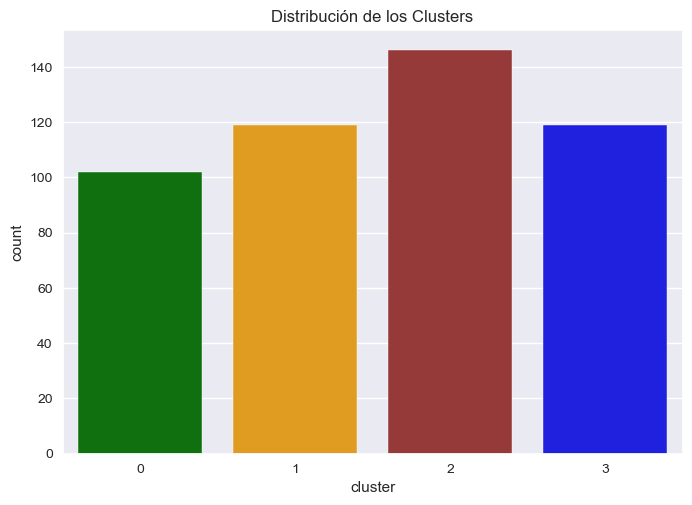

In [72]:
# Graficado con countplot los clusters.

pl = sns.countplot(x=df1["cluster"], palette= ['green','orange','brown','blue','red'])
pl.set_title("Distribución de los Clusters")
plt.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:

Los 4 grupos de clientes parecen estar bastante distribuidos.
         
</div>

### Uso de datos originales en el clustering

C:\Users\marce\AppData\Local\Temp\ipykernel_22772\3233111474.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=df1, x="Salario", y="Limite_TC", hue="cluster", s=60, palette=['green','orange','brown','blue','red'])


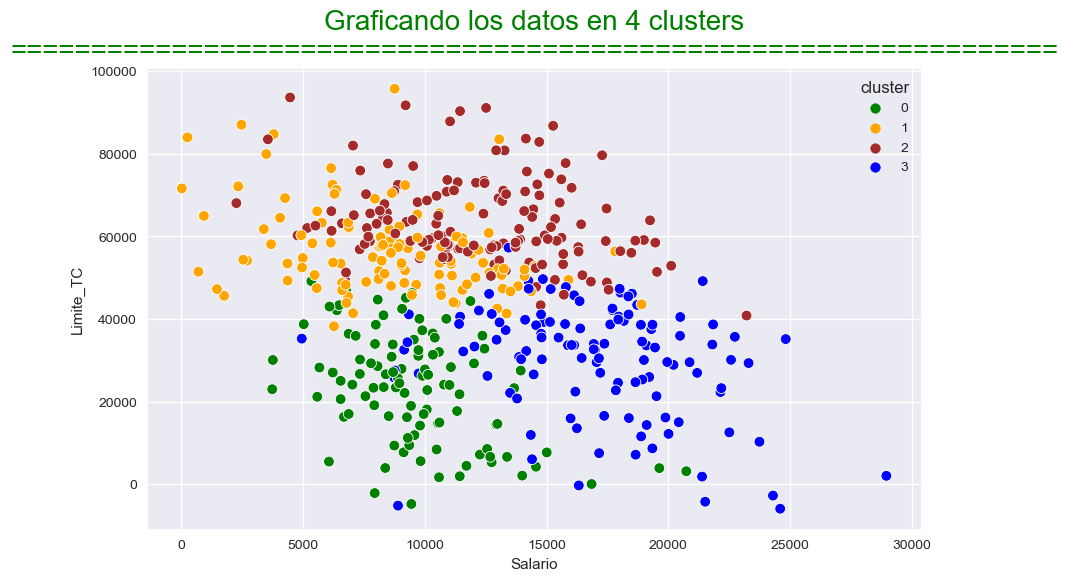

In [73]:

# ScatterPlot when K=4

plt.figure(figsize=(10,6))

plt.title("Graficando los datos en 4 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df1, x="Salario", y="Limite_TC", hue="cluster", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:

* Grupo 0: Clientes con Salario bajo y con límite de tarjeta de crédito bajo.
* Grupo 1: Clientes con Salario bajo y con límite de tarjeta de crédito intermedio.
* Grupo 2: Clientes con Salario intermedio y con límite de tarjeta de crédito alto.
* Grupo 3: Clientes con Salario alto y con límite de tarjeta de crédito intermedio.
         
</div>

In [74]:
import plotly.express as px
fig = px.box(df1,x='cluster', y="Salario", color='cluster', width = 800, height=500,title='cluster v/s Salario')
fig.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:
    
* Grupo 0: Clientes con Salario mínimo 3731 y máximo 15004.
* Grupo 1: Clientes con Salario mínimo 1811 y máximo 17817.
* Grupo 2: Clientes con Salario mínimo 2259 y máximo 20116.
* Grupo 3: Clientes con Salario mínimo 4944 y máximo 24820.
         
Los grupos de clientes 2 y 3 tienen salarios elevados.
         
</div>

In [75]:
fig = px.box(df1,x='cluster', y="Limite_TC", color='cluster', width = 800, height=500,title='cluster v/s Limite_TC')
fig.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:
    
* Clientes con limite de tarjeta de crédito alto grupo 1 y grupo 2.
* Clientes con limite de tarjeta de crédito bajo grupo 0 y grupo 3.
       
</div>

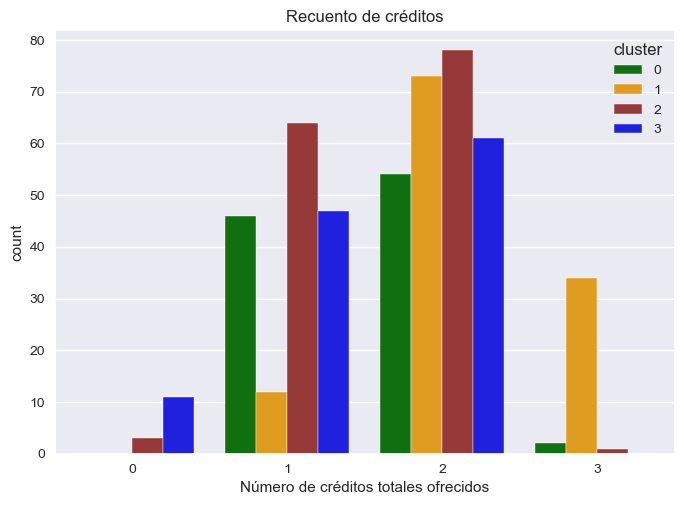

In [76]:
# 
df1["Credito"] = df1["Credito_tipo_1"]+ df1["Credito_tipo_2"]+ df1["Producto_ofrecido"]
#
plt.figure()
pl = sns.countplot(x=df1["Credito"],hue=df1["cluster"], palette=['green','orange','brown','blue','red'])
pl.set_title("Recuento de créditos")
pl.set_xlabel("Número de créditos totales ofrecidos")
plt.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:
    
* El grupo 1 y grupo 2, los clientes tienen un crédito del tipo 1, tipo 2 y Producto ofrecido.
* El grupo 0 y grupo 3, los clientes no abarca los distintos créditos ofrecidos por la empresa financiera, se requiere  campañas mejor orientadas a los clientes de este grupo.
       
</div>

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<Figure size 800x550 with 0 Axes>

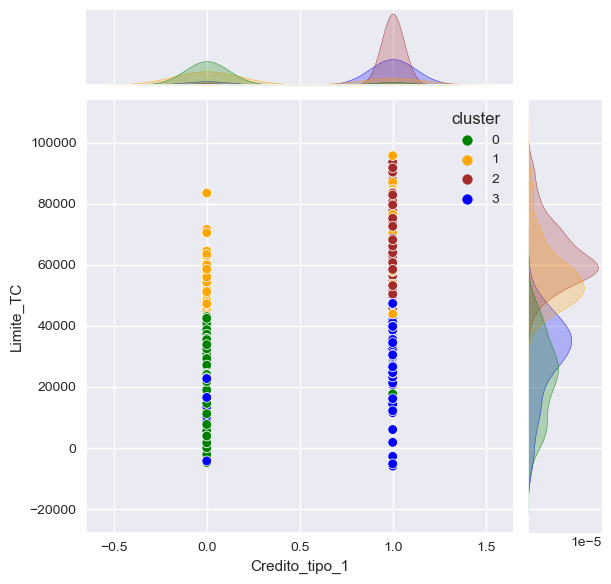

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<Figure size 800x550 with 0 Axes>

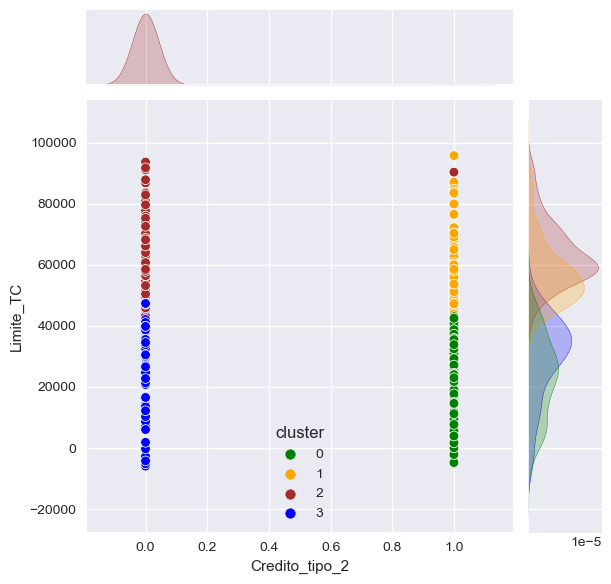

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<Figure size 800x550 with 0 Axes>

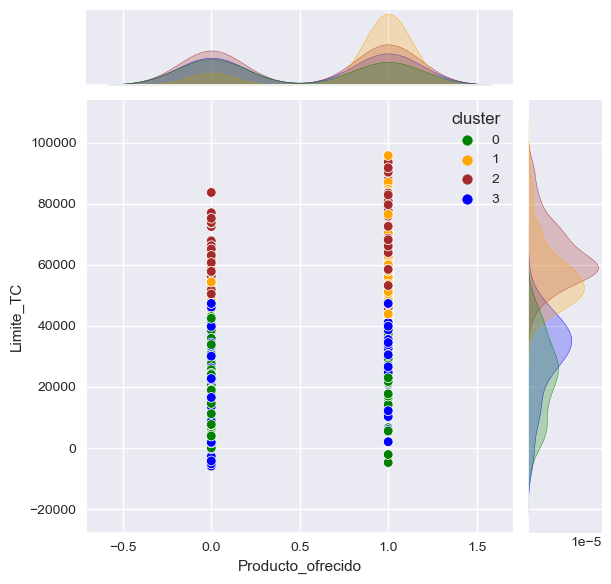

In [77]:
# Para mas detalle sobre los créditos
Producto =["Credito_tipo_1", "Credito_tipo_2", "Producto_ofrecido"] 

for i in Producto:
    plt.figure()
    sns.jointplot(x=df1[i],y = df1["Limite_TC"],hue=df1["cluster"], palette=['green','orange','brown','blue','red'])
    plt.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:
    
* Crédito tipo 1 versus límite de la tarjeta de crédito, el grupo 0 y grupo 1 no cuenta con el producto (0), grupo 3 y grupo 2 cuenta con el producto (1), este grupo cuenta con un límite de crédito superior a los 80000 pesos mexicanos. 

* Crédito tipo 2 versus límite de la tarjeta de crédito, el grupo 2 y grupo 3 no cuenta con el producto (0), grupo 0 y grupo 1 cuenta con el producto (1), todos los grupo cuenta con un límite de crédito mínimo y máximo similares.
    
    
* Producto ofrecido versus límite de la tarjeta de crédito, los grupos 0, grupos 1, grupos 2, grupos 3, se encuentran distribuidos en ambas opciones de estar interesado en obtener el producto previamente ofrecido con las opciones sí (1) o no (0), la opción si (1), es la que mayor predomina.
       
</div>

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<Figure size 800x550 with 0 Axes>

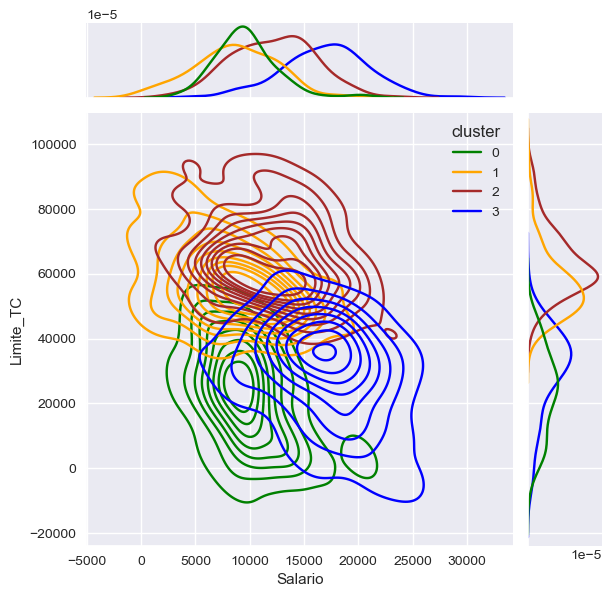

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.

C:\Users\marce\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<Figure size 800x550 with 0 Axes>

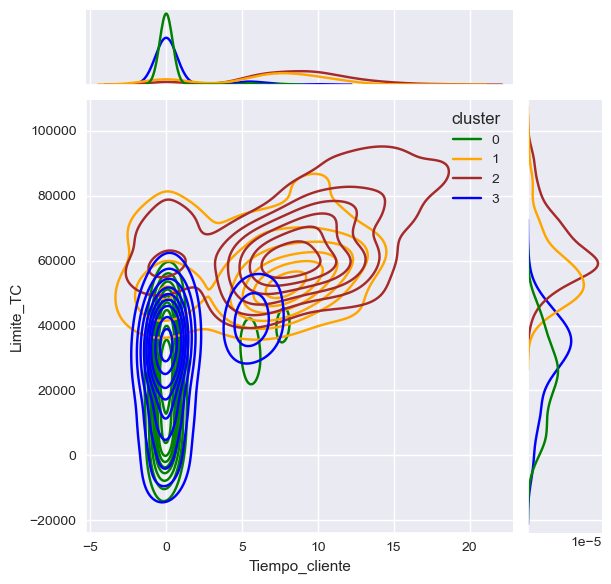

In [78]:
Cliente = [ "Salario","Tiempo_cliente"]

for i in Cliente:
    plt.figure()
    sns.jointplot(x=df1[i], y=df1["Limite_TC"], hue =df1["cluster"], kind="kde", palette=['green','orange','brown','blue','red'])
    plt.show()

<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:
    
**Salario versus límite de tarjeta de crédito**
    
* Grupo 0: Clientes con Salario entre los 2500 - 15000 pesos mexicanos y con límite de tarjeta de crédito entre 5000 - 55000 pesos mexicanos.
* Grupo 1: Clientes con Salario entre los 1000 - 20000 pesos mexicanos y con límite de tarjeta de crédito entre 35000 - 85000 pesos mexicanos.
* Grupo 2: Clientes con Salario entre los 2500 - 23000 pesos mexicanos y con límite de tarjeta de crédito entre 40000 - 90000 pesos mexicanos.
* Grupo 3: Clientes con Salario entre los 5000 - 26000 pesos mexicanos y con límite de tarjeta de crédito entre 5000 - 60000 pesos mexicanos.
       
    
**Tiempo cliente versus límite de tarjeta de crédito**

* Grupo 0 y grupo 3: Son clientes que tuvieron una relación comercial inicial en tiempo 0 hasta los 2.5 años y tienen un límite de tarjeta de crédito entre 1000 - 60000 pesos mexicanos.
    
* Grupo 1 y grupo 2: Son clientes que tuvieron una relación comercial inicial en tiempo 0 hasta más de 15 años y tienen un límite de tarjeta de crédito entre 40000 - 80000 pesos mexicanos. 

    
En los Grupo 0 y grupo 3 se requiere campañas mejor orientadas a estos clientes de este grupos para que permanezcan más en el tiempo.

       
</div>

 ### Evaluación de los modelos por medio de métricas

In [79]:
# Generamos los scores
Silueta = metrics.silhouette_score(pca_ds2, labels)
Calinski_Harabasz = metrics.calinski_harabasz_score(pca_ds2, labels)
Davies_Bouldin = metrics.davies_bouldin_score(pca_ds2, labels)

In [80]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.6424383406289306
Score indice Calinski-Harabasz :  1030.8494029227893
Score indice Davies-Bouldin:  0.49946346526528945


<div class="alert alert-info" role="alert">
<ul>
<li> Score modelos:
    
**La agrupación y separación de nuestro modelo de clustering son buenas debido a:**
    
* El analísis de siluena tiende a 1; por ende, tenemos una buena agrupación.
* El índice Calinski-Harabasz es alto: 1030; por ende, los grupos se separan mejor entre sí.
* El índice Davies-Bouldin es bajo: de 0.499; es decir, tenemos una buena separación entre grupos.
    
</div>

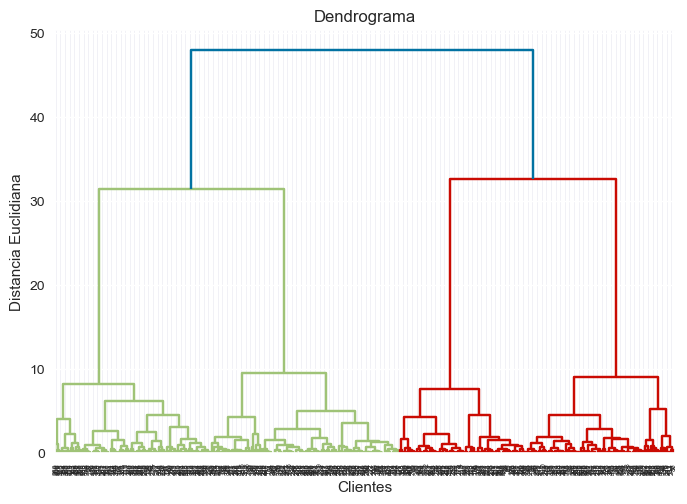

In [81]:
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
figsize=(8, 4)
dendrograma= hc.dendrogram(hc.linkage(pca_ds2, method="ward"))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


<div class="alert alert-info" role="alert">
<ul>
<li>Dendrograma:
    
**número de clusters**
    
* Al inspeccionar visualmente el dendograma y decidir a qué altura se corta para generar los clusters. Por ejemplo, para los resultados generados mediante distancia euclídea y linkage ward, parece sensato cortar el dendograma a una altura de entre 20 y 30, se crean 4 clusters. 
           
</div>

 ### Reto adicional aplicar modelo a los nuevos datos 

In [82]:
df2_new = read_csv('data/new_costumer.csv')

In [83]:
# Generamos una lista de todas las columnas del conjunto de datos
list(df2_new.columns)

['Salario',
 'Credito_tipo_1',
 'Credito_tipo_2',
 'Limite_TC',
 'Tiempo_cliente',
 'Producto_ofrecido',
 'Tipo_de_cliente']

In [84]:
# Mostrar dimenciones del df
df2_new.shape

(50, 7)

In [85]:
# Mostrar las 5 primeras filas
df2_new.head()

Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0  19028.02               1               0   18845.91             0.0   
1  17004.81               1               0   16421.36             0.0   
2  12973.54               1               0   57295.44             9.6   
3  13995.43               0               0   23556.17             7.7   
4  13155.66               0               1   61073.59            10.2   

   Producto_ofrecido  Tipo_de_cliente  
0                  1                3  
1                  0                2  
2                  1                2  
3                  0                3  
4                  1                0

In [86]:
# Imprime información de todas las columnas
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [87]:
# Se verifica dato nulos o faltantes
df2_new.isnull().sum()

Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
Tipo_de_cliente      0
dtype: int64

In [88]:
# Se determina los valores nulos como porcentaje
df2_new.isna().sum()/len(df2_new) *100

Salario              0.0
Credito_tipo_1       0.0
Credito_tipo_2       0.0
Limite_TC            0.0
Tiempo_cliente       0.0
Producto_ofrecido    0.0
Tipo_de_cliente      0.0
dtype: float64

In [89]:
#  número de registros duplicados, no hay registros duplicado
df2_new.duplicated().sum()

0

In [90]:
print(f"porcentaje de completitud: {df2_new.count().sum() / df2_new.size * 100:.2f}%")

porcentaje de completitud: 100.00%


<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

In [91]:
# Estadisticas variables numericas 
df2_new.describe().T

count        mean           std      min         25%  \
Salario             50.0  13232.1144   5767.078320  -638.96   9783.8875   
Credito_tipo_1      50.0      0.5200      0.504672     0.00      0.0000   
Credito_tipo_2      50.0      0.5000      0.505076     0.00      0.0000   
Limite_TC           50.0  38422.6698  20240.655015 -2756.45  22922.6175   
Tiempo_cliente      50.0      2.9440      3.973338     0.00      0.0000   
Producto_ofrecido   50.0      0.7000      0.462910     0.00      0.0000   
Tipo_de_cliente     50.0      1.3800      1.122861     0.00      0.0000   

                         50%         75%       max  
Salario            12849.835  16788.6725  23890.65  
Credito_tipo_1         1.000      1.0000      1.00  
Credito_tipo_2         0.500      1.0000      1.00  
Limite_TC          39054.305  52052.3200  83578.93  
Tiempo_cliente         0.000      6.3500     11.30  
Producto_ofrecido      1.000      1.0000      1.00  
Tipo_de_cliente        1.000      2.0000      3.00

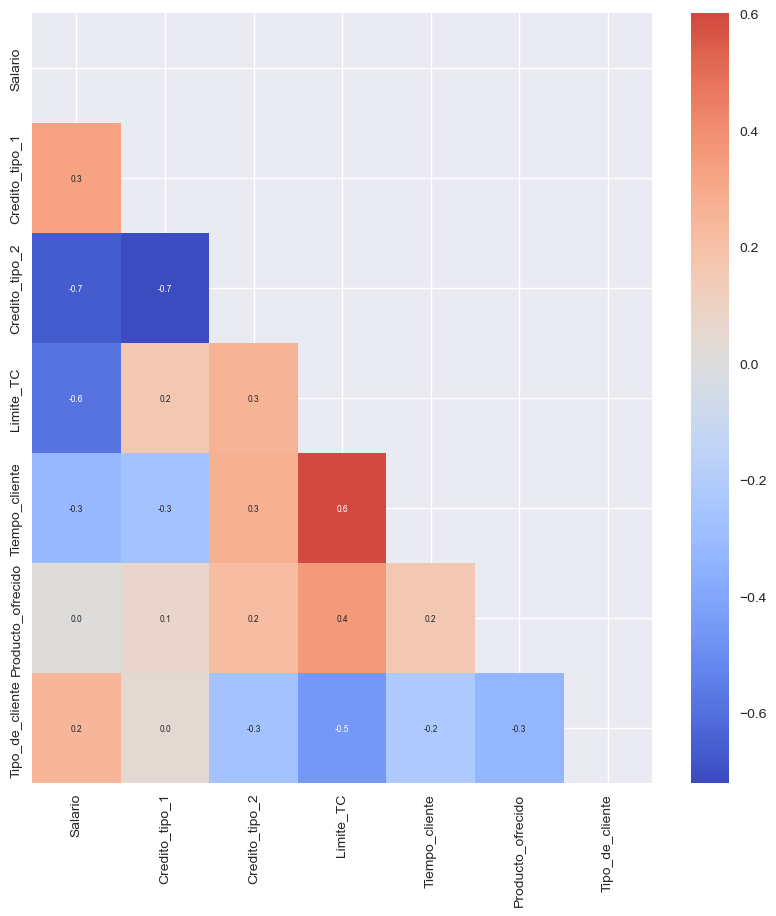

In [92]:
# Calcula la matriz de correlación
corrmat = df2_new.corr()
 
# Obtén la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(corrmat, dtype=bool))
 
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))
 
# Crea el mapa de calor con la mitad superior de la matriz de correlación
sns.heatmap(corrmat, mask=mask, annot=True, cmap='coolwarm', center=0, fmt=".1f", annot_kws={"size": 6})
 
# Mostrar el mapa de calor
plt.show()

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

C:\Users\marce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



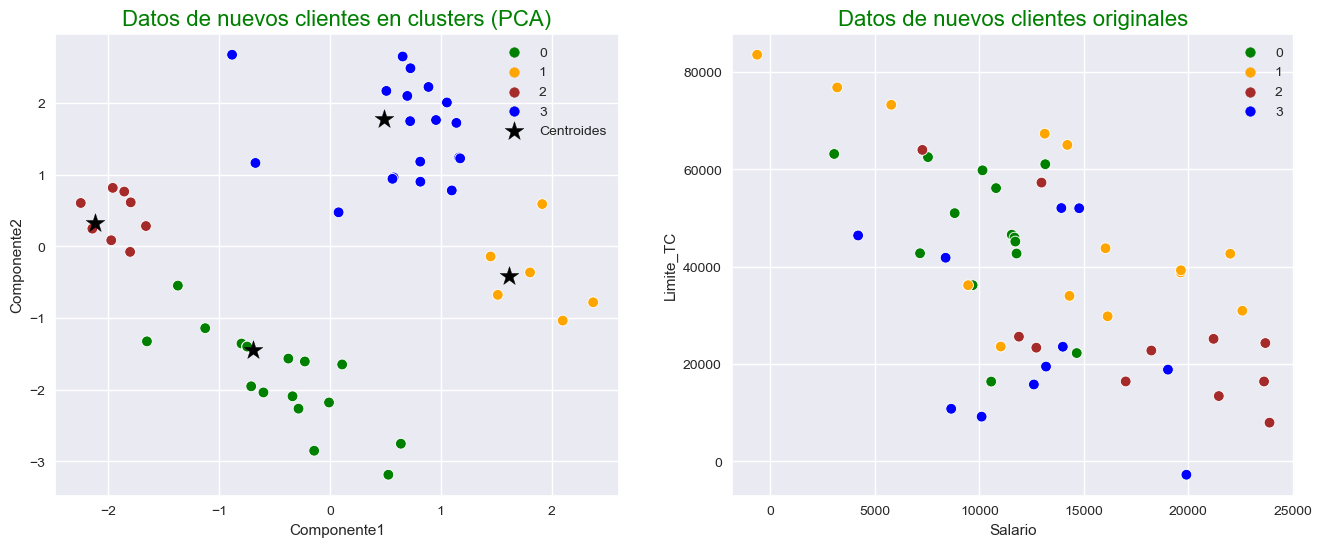

In [93]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Supongamos que solo las primeras 6 columnas (0 a 5) son características numéricas y la última columna (6) es 'Tipo_de_cliente'

# Separar las características numéricas y 'Tipo_de_cliente'
caracteristicas_numericas = df2_new.iloc[:, :-1]  # Excluye la columna 'Tipo_de_cliente'
tipo_cliente = df2_new['Tipo_de_cliente']  # Columna 'Tipo_de_cliente'

# Escalar las características numéricas
scaler = StandardScaler()
scaled_caracteristicas = scaler.fit_transform(caracteristicas_numericas)

# Aplicar PCA solo a las características numéricas
pca_nuevos = pca2.transform(scaled_caracteristicas)

# Combinar los resultados de PCA con la columna 'Tipo_de_cliente'
resultados = pd.DataFrame(pca_nuevos, columns=['Componente1', 'Componente2'])  # Crear un DataFrame con los resultados de PCA
resultados['Tipo_de_cliente'] = tipo_cliente  # Agregar la columna 'Tipo_de_cliente' al DataFrame de resultados

# Predecir los clusters en los nuevos datos transformados por PCA
clusters_nuevos = modelo_kmeans.predict(pca_nuevos)

# Agregar la columna de clusters al DataFrame de resultados
resultados['cluster'] = clusters_nuevos

# Visualizar los nuevos datos en un scatter plot junto con los datos originales
plt.figure(figsize=(16, 6))

# Subplot 1: Scatter plot con datos transformados por PCA
plt.subplot(1, 2, 1)
plt.title("Datos de nuevos clientes en clusters (PCA)", fontsize=16, color="green")
sns.scatterplot(data=resultados, x="Componente1", y="Componente2", hue="cluster", s=60, palette=['green', 'orange', 'brown', 'blue'])
plt.scatter(center_coord[0], center_coord[1], color= 'black', marker='*',s=200, label='Centroides')
plt.legend()

# Subplot 2: Scatter plot con datos originales
plt.subplot(1, 2, 2)
plt.title("Datos de nuevos clientes originales", fontsize=16, color="green")
sns.scatterplot(data=df2_new, x="Salario", y="Limite_TC",hue="Tipo_de_cliente", s=60, palette=['green', 'orange', 'brown', 'blue'])

plt.legend()

plt.show()


<div class="alert alert-info" role="alert">
<ul>
<li>Conclusión:

* Según esta grafica con los nuevos clientes ingresado se sigue formando los 4 grupos, se podría clasificar los nuevos grupos en función de su salario y poder ofrecer un nuevo producto.
        
</div>